# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
import heapq
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import DistanceMetric
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load and display the data

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [ ]:
from google.colab import files
uploaded = files.upload()
tweet_df = pd.read_csv('Tweets.csv')

Saving Tweets.csv to Tweets.csv


In [ ]:
uploaded = files.upload()
result = pd.read_csv('ground_truth.csv', names = ['result'])

Saving ground_truth.csv to ground_truth.csv


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

## Part-1
*Vectorize tweets using only meta data*

In [ ]:
def euclidean(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [ ]:
from itertools import chain
def predict_output(x_train, x_test,y_train, k):
  x_train_numpy = x_train.values
  x_test_numpy = x_test.values
  y_train_numpy = y_train.values
  op_labels = []
  i = 0
  for test_point in x_test_numpy:
    # print(test_point)
    point_dist = []
    for train_point in x_train_numpy:
      distance = euclidean(train_point, test_point)
      point_dist.append(distance)
    point_dist = np.array(point_dist) 
    if(i % 1000 == 0):
      print("Data Point = ",i)
    i = i + 1
    dist = np.argsort(point_dist)[:k] 
    labels = y_train_numpy[dist]
    labels = list(chain.from_iterable(labels))
    op_labels.append(np.bincount(labels).argmax())
  return op_labels

In [ ]:
def get_features():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  meta_data_columns = ['retweet_count', 'favorite_count', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count','user_verified', 'user_statuses_count']
  meta_data = tweet_df[meta_data_columns]
  meta_data['user_verified'] = meta_data['user_verified'].astype(int)
  meta_data['retweet_count'] = meta_data['retweet_count'].astype(int)

  # Feature Scaling
  scaler = StandardScaler()
  meta_data_arr = scaler.fit_transform(meta_data)
  meta_data = pd.DataFrame(meta_data_arr, columns = meta_data_columns)

  return meta_data, meta_data_columns
  # your code here

In [ ]:
def split_meta_data():
  meta_data, meta_data_columns = get_features()
  X = meta_data[meta_data_columns]
  Y = result
  x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = split_meta_data()
predictions1 = predict_output(x_train, x_test, y_train, 3)
predictions2 = predict_output(x_train, x_test, y_train, 5)
predictions3 = predict_output(x_train, x_test, y_train, 7)
predictions4 = predict_output(x_train, x_test, y_train, 9)
predictions5 = predict_output(x_train, x_test, y_train, 11)
# accuracy_score(y_test, predictions)

<ipython-input-10-b43ecbb21798>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['user_verified'] = meta_data['user_verified'].astype(int)
<ipython-input-10-b43ecbb21798>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['retweet_count'] = meta_data['retweet_count'].astype(int)


Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions1)
cm

array([[2512,   42],
       [  66,  155]])

In [ ]:
acc_lis = [accuracy_score(y_test, predictions1),
accuracy_score(y_test, predictions2),
accuracy_score(y_test, predictions3),
accuracy_score(y_test, predictions4),
accuracy_score(y_test, predictions5)]
k_lis = [3,5,7,9,11]

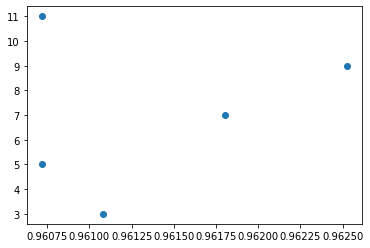

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(acc_lis, k_lis)

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [ ]:
# your code here

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [ ]:
def pre_process(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
  return ' '.join(lemma_words)

In [ ]:
def inbuilt_tf_idf(tweets_text_df):
  tweets_text_df = tweets_text_df.apply(pre_process)
  tweets_text_df = tweets_text_df.to_frame(name="text")
  tf_idf = TfidfVectorizer()
  tf_idf_mat_inbuilt = tf_idf.fit_transform(tweets_text_df['text'])
  # a = tf_idf_mat_inbuilt.toarray()
  # tf_idf_mat_inbuilt_df = pd.DataFrame(tf_idf_mat_inbuilt)
  return tf_idf_mat_inbuilt

In [ ]:
from sklearn.model_selection import train_test_split
def tf_idf_split(tf_idf_df):
  Y = result
  X = tf_idf_df
  # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)
  return x_train, x_test, y_train, y_test

In [ ]:
tweets_text_df= tweet_df['text'] 
tf_idf_df = inbuilt_tf_idf(tweets_text_df)
# tf_idf_df.info()

In [ ]:
# tf_idf_df.head()
type(tf_idf_df)


scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, random_state = 42)
tf_idf_pca = pca.fit_transform(tf_idf_df.toarray())

# accuracy_score(y_test, predictions)

In [ ]:
x_train, x_test, y_train, y_test = tf_idf_split(tf_idf_pca)


In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
predictions1 = predict_output(x_train, x_test, y_train, 3)
predictions2 = predict_output(x_train, x_test, y_train, 5)
predictions3 = predict_output(x_train, x_test, y_train, 7)
predictions4 = predict_output(x_train, x_test, y_train, 9)
predictions5 = predict_output(x_train, x_test, y_train, 11)
# predictions.shape()

Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000


In [ ]:
acc_lis = [accuracy_score(y_test, predictions1),
accuracy_score(y_test, predictions2),
accuracy_score(y_test, predictions3),
accuracy_score(y_test, predictions4),
accuracy_score(y_test, predictions5)]
k_lis = [3,5,7,9,11]

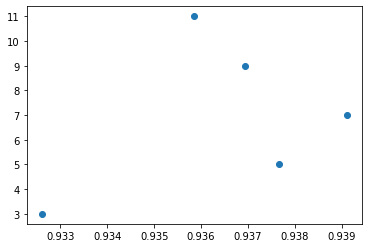

In [ ]:
plt.scatter(acc_lis, k_lis)

In [ ]:
def tweet_vectoriser():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
# your code here

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [ ]:
# your code here
meta_data, meta_data_columns = get_features()
# dense_tf_idf_mat = tf_idf_df.toarray()
dense_tf_idf_mat_df = pd.DataFrame(tf_idf_pca)
Final_df_inbuilt = pd.concat([dense_tf_idf_mat_df, meta_data], axis=1)

<ipython-input-10-b43ecbb21798>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['user_verified'] = meta_data['user_verified'].astype(int)
<ipython-input-10-b43ecbb21798>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['retweet_count'] = meta_data['retweet_count'].astype(int)


In [ ]:
x_train, x_test, y_train, y_test = tf_idf_split(Final_df_inbuilt)
predictions1 = predict_output(x_train, x_test, y_train, 3)
predictions2 = predict_output(x_train, x_test, y_train, 5)
predictions3 = predict_output(x_train, x_test, y_train, 7)
predictions4 = predict_output(x_train, x_test, y_train, 9)
predictions5 = predict_output(x_train, x_test, y_train, 11)

Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000
Data Point =  0
Data Point =  1000
Data Point =  2000


In [ ]:
acc_lis = [accuracy_score(y_test, predictions1),
accuracy_score(y_test, predictions2),
accuracy_score(y_test, predictions3),
accuracy_score(y_test, predictions4),
accuracy_score(y_test, predictions5)]
k_lis = [3,5,7,9,11]

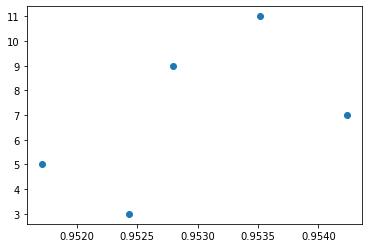

In [ ]:
plt.scatter(acc_lis, k_lis)

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
# your code here

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

```Accuracy with only Meta Data ``` :- <br>
The accuracy obtained from using only the meta data is the highest. However when I tried to add extra fields to the meta data the accuracy was decreasing. <br>
```Accuracy with only Tweet's Text ```:- <br>
The accuracy obtained from using only the Tweet's Text is the lowest denoting that the ouput is not heavily relying on the Tweet's text.<br>
```Accuracy using both Meta Data and Tweet's Text ```:- <br>
The Accuracy in this case lies some where in between the both the above accuracies.